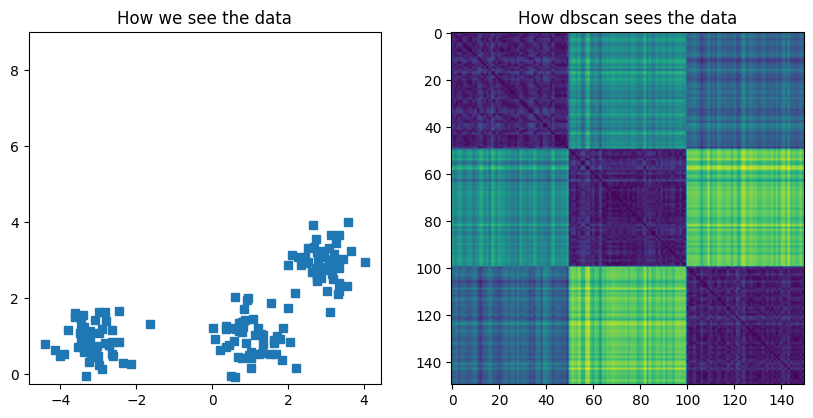

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

nPerClust = 50

blur = .5

A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

data = np.transpose( np.concatenate((a,b,c),axis=1) )

fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].plot(data[:,0],data[:,1],'s')
ax[0].set_title('How we see the data')
ax[0].axis('square')

D = np.zeros((len(data),len(data)))
for i in range(len(D)):
    for j in range(len(D)):
        D[i,j] = np.sqrt( (data[i,0]-data[j,0])**2 + (data[i,1]-data[j,1])**2 )

ax[1].imshow(D)
ax[1].set_title('How dbscan sees the data')
plt.show()

[[ 1.0140332   0.94722274]
 [-3.1647943   0.85755579]
 [ 2.95975485  2.92292606]]


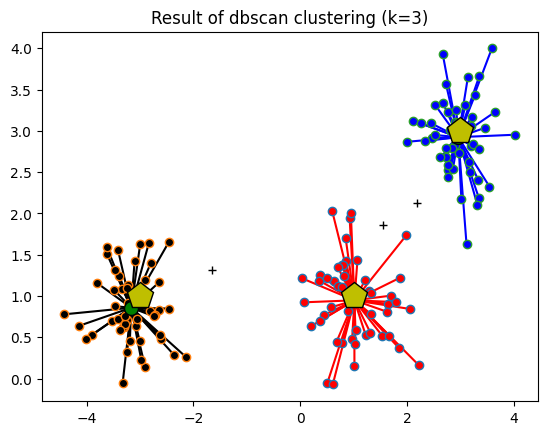

In [2]:
clustmodel = DBSCAN(eps=.6,min_samples=6).fit(data)
groupidx = clustmodel.labels_

nclust = max(groupidx)+1

cents = np.zeros((nclust,2))
for ci in range(nclust):
    cents[ci,0] = np.mean(data[groupidx==ci,0])
    cents[ci,1] = np.mean(data[groupidx==ci,1])
print(cents)

lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
for i in range(len(data)):
    if groupidx[i]==-1:
        plt.plot(data[i,0],data[i,1],'k+')
    else:
        plt.plot([ data[i,0], cents[groupidx[i],0] ],[ data[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
        

for i in range(nclust):
    plt.plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])

plt.plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')

plt.plot(A[0],A[1],'kp',markersize=20,markerfacecolor='y')
plt.plot(B[0],B[1],'kp',markersize=20,markerfacecolor='y')
plt.plot(C[0],C[1],'kp',markersize=20,markerfacecolor='y')

plt.show()

/tmp/ipykernel_140237/4192865537.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
/tmp/ipykernel_140237/4192865537.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))


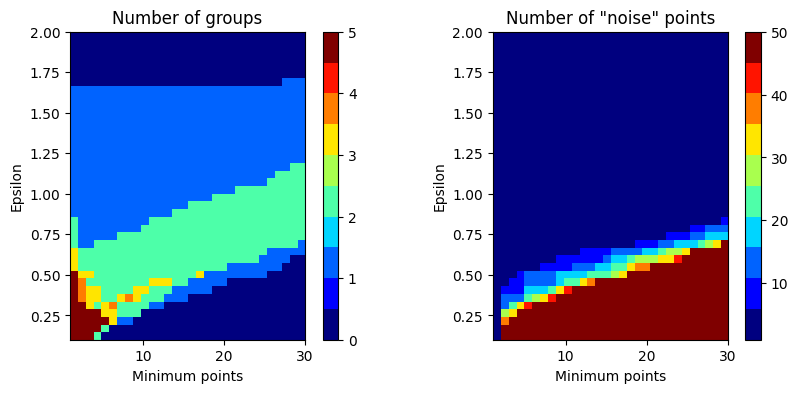

In [6]:
epsilons = np.linspace(.1,2,40)
minpoints = np.arange(1,31)

results = np.zeros((len(epsilons),len(minpoints),2))

for ei in range(len(epsilons)):
    for di in range(len(minpoints)):
        clustmodel = DBSCAN(eps=epsilons[ei],min_samples=minpoints[di]).fit(data)
        groupidx = clustmodel.labels_
        results[ei,di,0] = max(groupidx)
        results[ei,di,1] = sum(groupidx==-1)

from pylab import cm

fig,ax = plt.subplots(1,2,figsize=(10,4))
aa = ax[0].imshow(results[:,:,0],vmin=0,vmax=5,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]],
                  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
ax[0].set_xlabel('Minimum points')
ax[0].set_ylabel('Epsilon')
ax[0].set_title('Number of groups')
plt.colorbar(aa,ax=ax[0])

aa = ax[1].imshow(results[:,:,1],vmin=1,vmax=len(data)/3,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]],
                  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
ax[1].set_xlabel('Minimum points')
ax[1].set_ylabel('Epsilon')
ax[1].set_title('Number of "noise" points')
plt.colorbar(aa,ax=ax[1])

plt.show()

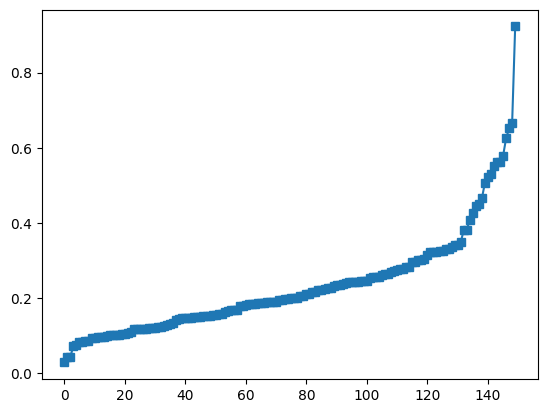

(2000, 2)


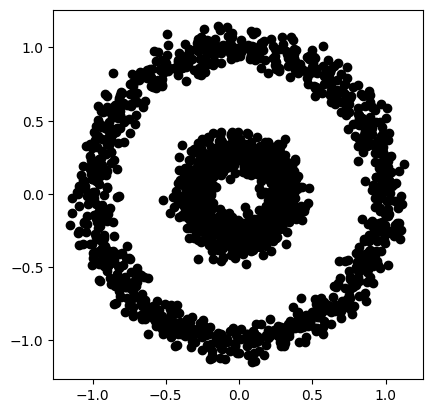

In [4]:
D = np.zeros(len(data))

for i in range(len(data)):
    d = np.sqrt( (data[i,0]-data[:,0])**2 + (data[i,1]-data[:,1])**2 )
    
    d = np.sort(d)
    D[i] = d[2]
    
plt.plot(np.sort(D),'s-')
plt.show()


N = 1000
th = np.linspace(0,2*np.pi,N)

data1 = np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15
data2 = .3*np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15

circdata = np.hstack((data1,data2)).T
print(np.shape(circdata))

# plot
plt.plot(circdata[:,0],circdata[:,1],'ko')
plt.axis('square')
plt.show()

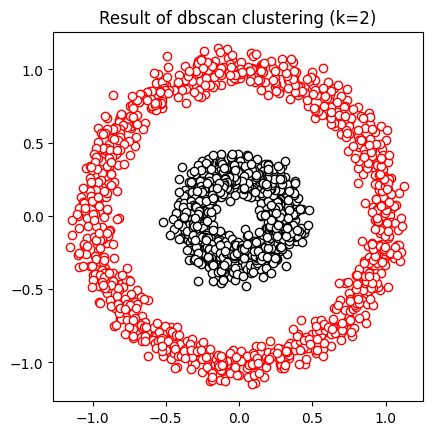

In [5]:
clustmodel = DBSCAN(eps=.2,min_samples=6).fit(circdata)
groupidx = clustmodel.labels_

nclust = max(groupidx)+1

for i in range(nclust):
    plt.plot(circdata[groupidx==i,0],circdata[groupidx==i,1],'o',color=lineColors[i],markerfacecolor='w')

plt.plot(circdata[groupidx==-1,0],circdata[groupidx==-1,1],'k+')
plt.axis('square')
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')

plt.show()